<!DOCTYPE html>
<html lang="en">
 <head>
  <meta charset="utf-8"/>
  <meta content="ie=edge" http-equiv="x-ua-compatible"/>
  <meta content="width=device-width, initial-scale=1.0, maximum-scale=1" name="viewport"/>
  <meta content="Consult the Heart and Stroke Foundation's collection of information to better understand how heart medications work." name="description"/>
  <meta content="heart medications, heart medication, medication for heart disease, blood pressure, high blood pressure, hypertension" name="keywords"/>
  <meta content="Medications" property="og:title"/>
  <meta content="Consult the Heart and Stroke Foundation's collection of information to better understand how heart medications work." property="og:description"/>
  <meta content="website" property="og:type"/>
  <meta content="https://www.heartandstroke.ca/-/media/home-share-en.jpg?rev=504c6b1dc2e74fbdab00545f1cf44f2e" property="og:image"/>
  <meta content="https://www.heartandstroke.ca/en/heart-disease/treatments/medica
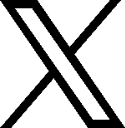

In [19]:
import requests
from bs4 import BeautifulSoup
import csv

# URL of the AHA page for cardiac medications
url = "https://www.heartandstroke.ca/heart-disease/treatments/medications"

# Fetch the page content
response = requests.get(url)
soup = BeautifulSoup(response.text, 'html.parser')

print(soup.prettify())


In [20]:
# Extract the medication sections
medication_sections = soup.find_all('h2')

# Initialize a dictionary to store the medication data
medication_data = {}

# Extract data for each medication type
for section in medication_sections:
    section_name = section.text.strip()
    section_content = section.find_next('div').get_text(separator="\n", strip=True)
    medication_data[section_name] = section_content

# Write the data to a CSV file
csv_file = 'medications.csv'

with open(csv_file, mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['Medication Type', 'Description'])

    for medication, description in medication_data.items():
        writer.writerow([medication, description])

print(f"Data has been written to {csv_file}")


Data has been written to medications.csv
